## IMPORT LIBRARIES

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
import statistics
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import nbimporter

## Import Dataset

In [2]:
df = pd.read_csv('OneDrive/Documenti/GitHub/MDS-python/Marcello Brambilla/2019-05.csv')
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.00,6.00,6.00,2.0,6.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2437.296,2288.8,17.302,2.922588e+05,18235.77392,22.6250,23.4581,22.1904,32.4078,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.00,12298.00,84.2043,NaN
2,2/1/1959,2446.902,2297.0,17.482,2.944295e+05,18369.56308,23.0681,23.7747,22.3827,32.6455,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.00,12298.00,83.5280,NaN
3,3/1/1959,2462.689,2314.0,17.647,2.934254e+05,18523.05762,23.4004,23.9186,22.4925,32.6455,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.00,12349.00,81.6405,NaN
4,4/1/1959,2478.744,2330.3,17.584,2.993317e+05,18534.46600,23.8989,24.2641,22.8221,33.1606,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,1/1/2019,16486.710,13622.3,118.513,1.517735e+06,507204.00000,110.0707,105.0866,103.6056,105.3838,...,116.279,24.41,28.15,21.85,91.2,15776.5,312528.96,734171.07,3533.5509,20.3971
722,2/1/2019,16510.294,13632.1,118.395,1.514035e+06,505817.00000,109.5742,104.7477,103.4804,105.6151,...,116.432,24.41,28.19,21.92,93.8,15790.5,311681.04,729260.46,3534.4859,15.1771
723,3/1/2019,16496.095,13605.4,119.465,1.523251e+06,514329.00000,109.7431,105.1275,103.9854,106.0361,...,116.656,24.52,28.30,21.94,98.4,15827.6,312621.30,729109.72,3557.8750,14.6056
724,4/1/2019,16529.500,13631.8,119.431,NaN,513356.00000,109.1818,103.9723,102.6655,104.8006,...,117.092,24.60,28.41,21.97,97.2,15874.5,NaN,NaN,3607.3773,12.3282


In [3]:
df.iloc[450]

sasdate              6/1/1996
RPI                  9139.896
W875RX1                7859.1
DPCERA3M086SBEA        64.889
CMRMTSPLx          916487.771
                      ...    
MZMSL                  3097.0
DTCOLNVHFNM          86333.37
DTCTHFNM            303932.73
INVEST               899.6083
VXOCLSx               17.6216
Name: 450, Length: 129, dtype: object

## Transformations

In [4]:
from datetime import datetime, timedelta

In [5]:
df_NDG = df[['sasdate','IPFPNSS']]
df_NDG.dropna(inplace=True)
df_NDG.drop(index=0,inplace=True)
df_NDG.reset_index(inplace=True, drop=True)
df_NDG['sasdate']= pd.to_datetime(df_NDG.sasdate)

In [6]:
df_NDG['IPFPNSS'] = np.log(df_NDG['IPFPNSS'])

<AxesSubplot:xlabel='sasdate'>

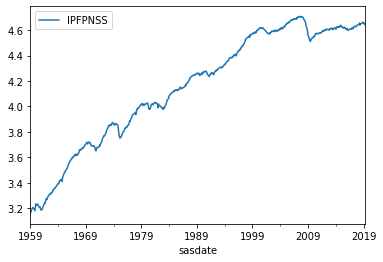

In [7]:
df_NDG.plot(x='sasdate', y= 'IPFPNSS')

### Dividere in ' training set' e ' test set'

In [8]:
df_NDG = df_NDG['IPFPNSS'][300:450]

In [9]:
df_NDG_train = df_NDG[:120]

In [10]:
df_NDG_test = df_NDG[120:150]

## ACF e PACF

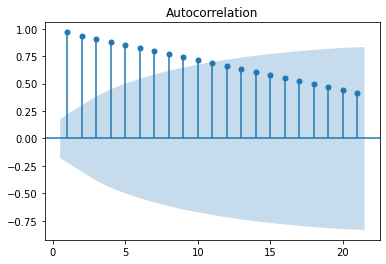

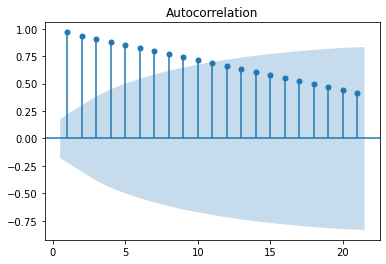

In [11]:
plot_acf(df_NDG_train, zero=False)

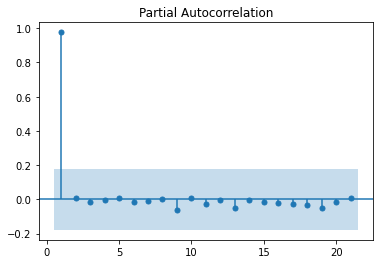

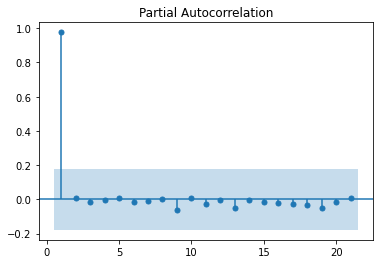

In [12]:
plot_pacf(df_NDG_train, zero = False)

## ADF

In [13]:
adfuller(df_NDG_train)

(-0.9594317606851474,
 0.7677716957079979,
 3,
 116,
 {'1%': -3.4880216384691867,
  '5%': -2.8867966864160075,
  '10%': -2.5802408234244947},
 -791.4055809473608)

## 6 Stima p e q

#### Serie in differenza prima

In [14]:
pmax = 4
qmax = 4
aic = np.empty((pmax+1,qmax+1))
aic[:] = np.NaN
bic = aic
for p in range(0,pmax+1):
    for q in range(0,qmax+1):
        a = ARIMA(df_NDG_train, order=(p,1,q))
        mdl = a.fit()
        aic[p,q] = mdl.aic
        bic[p,q] = mdl.bic

In [15]:
aic_min = list(np.unravel_index(aic.argmin(), aic.shape))
aic_min

[3, 0]

In [16]:
bic_min = list(np.unravel_index(bic.argmin(), bic.shape))
bic_min

[3, 0]

## Residui

#### Serie in differenza prima 

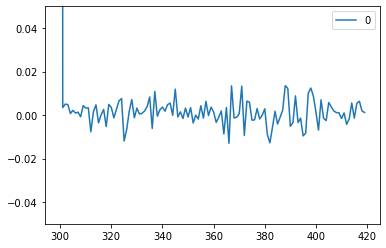

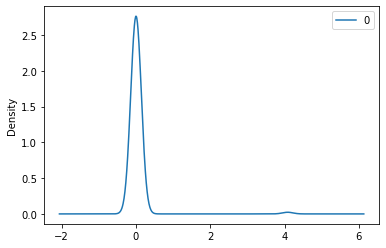

                0
count  120.000000
mean     0.035174
std      0.372750
min     -0.012970
25%     -0.001528
50%      0.001424
75%      0.004326
max      4.083991


In [17]:
a = ARIMA(df_NDG_train, order=(3,1,0))
mdl = a.fit()
residuals = pd.DataFrame(mdl.resid)
residuals.plot(ylim=(-0.05,0.05))
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

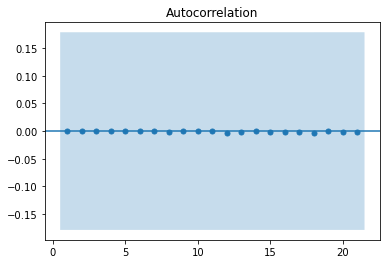

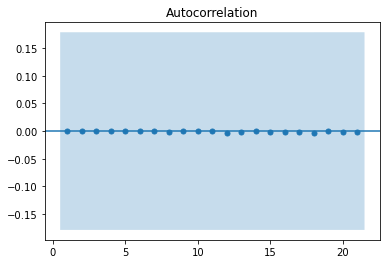

In [18]:
plot_acf(residuals,zero=False)

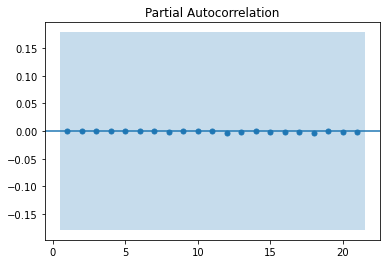

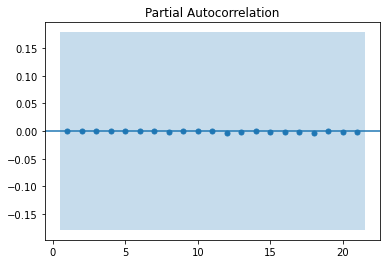

In [19]:
plot_pacf(residuals,zero=False)

In [20]:
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:                IPFPNSS   No. Observations:                  120
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 450.158
Date:                Sat, 16 Apr 2022   AIC                           -892.316
Time:                        13:07:14   BIC                           -881.200
Sample:                             0   HQIC                          -887.802
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.073     -0.237      0.813      -0.160       0.125
ar.L2          0.1749      0.087      2.003      0.045       0.004       0.346
ar.L3          0.2983      0.091      3.270      0.0

## predizione 

#### modello 1

In [21]:
pred = []
test_size = len(df_NDG_test)
for i in range(test_size):
    a = ARIMA(df_NDG[:len(df_NDG_train)+i], order=(3,1,0))
    mdl = a.fit()
    pred.append(float(mdl.forecast(1)))

In [22]:
pred = pd.Series(pred)

In [23]:
pred.index = np.arange(420, 450)

<AxesSubplot:>

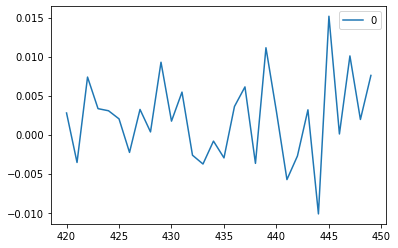

In [24]:
residuals = df_NDG_test - pred
pd.DataFrame(residuals).plot()

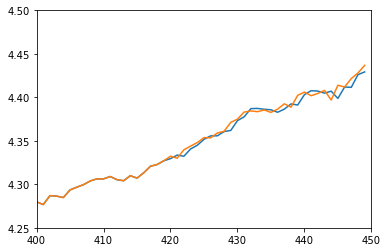

In [25]:
total = pd.concat([df_NDG_train,pred])

total.plot(ylim=[4.25,4.5],xlim=[400,450])
#total.plot()
plt.plot(df_NDG)
plt.show()

#### Mean Square Forecast Error

In [26]:
MSFE = statistics.mean((df_NDG_test - pred)**2)
MSFE

3.3573281948029396e-05

### Modello 2

In [27]:
list_NDG = list(df_NDG)
diff_prime = [0]
for i in range(1,len(df_NDG)):
    diff_prime.append(list_NDG[i] - list_NDG[i-1])

In [28]:
df_NDG = pd.DataFrame(df_NDG)

In [29]:
diff_prime = pd.Series(diff_prime)

In [30]:
df_NDG['diff'] = diff_prime.values

In [31]:
df_NDG

,IPFPNSS,diff
300,4.083991,0.000000
301,4.087429,0.003438
302,4.092646,0.005217
303,4.098305,0.005659
304,4.100848,0.002543
...,...,...
445,4.413906,0.016995
446,4.411919,-0.001986
447,4.421596,0.009677
448,4.428044,0.006448


In [32]:
avg_diff = []
test_size = len(df_NDG_test)

for i in range(test_size):
    a = df_NDG[:len(df_NDG_train)+ i+1]['diff'].mean()
    avg_diff.append(a)
    
avg_diff = pd.Series(avg_diff)

In [33]:
pred2 = []
temp = df_NDG[len(df_NDG_train)-1:]['IPFPNSS'].reset_index(drop=True)

for i in range (test_size):
    b = avg_diff[i] + temp[i]
    pred2.append(b)

pred2 = pd.Series(pred2)

total = pd.concat([df_NDG_train.reset_index(drop=True), pred2])
total.index = np.arange(300, 450)

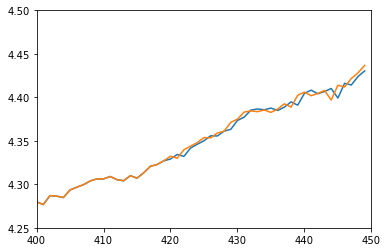

In [34]:
total.plot(ylim=[4.25,4.50],xlim=[400,450])
plt.plot(df_NDG['IPFPNSS'])
plt.show()

In [35]:
residuals2 = df_NDG_test.reset_index(drop=True) - pred2

<AxesSubplot:>

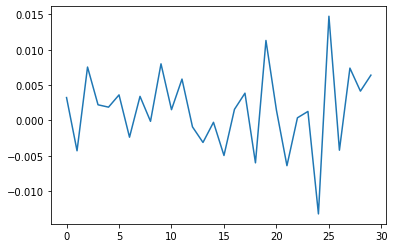

In [36]:
residuals2.plot()

#### Mean Square Forecast Error

In [37]:
MSFE2 = statistics.mean(df_NDG_test.reset_index(drop=True) - pred2)**2
MSFE2

2.1235259488606746e-06

## Test Diebold-Mariano 

In [41]:
from diebold_mariano_test import *
#import random

#random.seed(123)
actual_lst = list(df_NDG_test)
pred1_lst = list(pred)
pred2_lst = list(pred2)

#actual_lst = random.sample(actual_lst,100)
#pred1_lst = random.sample(pred1_lst,100)
#pred2_lst = random.sample(pred2_lst,100)

d_t_list = cul_d_t(MSE,actual_lst,pred1_lst,pred2_lst)
cul_DM(d_t_list)


-0.01904488300530579

In [42]:
cul_P(d_t_list) #pvalue

0.984805300432078

In [43]:
d_t_list1 = cul_d_t(MAE,actual_lst,pred1_lst,pred2_lst)
cul_DM(d_t_list1)

0.34474539474730714

In [44]:
cul_P(d_t_list1)

0.7302857877467339